In [1]:
import pandas as pd 
import numpy as np

In [2]:
data1=pd.read_csv('data3G.csv')

In [3]:
print(list(data1.columns)[16])
print(list(data1.columns)[17])

VS.LCC.OLC.DL.Num
VS.LCC.OLC.UL.Num


In [5]:
data1.sort_values(by='RNC', ascending=True, na_position='first', inplace=True)

In [6]:
data1.to_csv('sorted.csv',index=False, index_label=False)

In [7]:
data11=pd.read_csv('sorted.csv')

In [8]:
RNC_Col_list = data11['RNC'].drop_duplicates().tolist()

In [9]:
#---->get index of same Site NAME
index_list = data11.groupby(list(data11['RNC'])).apply(lambda x: tuple(x.index)).tolist()
index_list.sort()

In [ ]:
df=pd.DataFrame()

In [10]:
def getOverLoad_RNC(DATA): 
    dict_RNC={}
    for tuple_index,RNC in enumerate (RNC_Col_list):
        list_DL=[]
        list_UL=[]
        len_tuple=len(index_list[tuple_index])
        for x in range(len_tuple):
            row_num=index_list[tuple_index][x]
            list_UL.append(DATA['VS.LCC.OLC.UL.Num'][row_num])
            list_DL.append(DATA['VS.LCC.OLC.DL.Num'][row_num])
        dict_RNC[RNC+"_DL"]=list_DL
        dict_RNC[RNC+"_UL"]=list_UL
    return dict_RNC         

In [20]:

def getOverLoad_RNC2(DATA): 
    a = dict()
    for tuple_index,RNC in enumerate (RNC_Col_list):
        a[RNC] = []
        list_DL=[]
        list_UL=[]
        len_tuple=len(index_list[tuple_index])
        for x in range(len_tuple):
            row_num=index_list[tuple_index][x]
            list_UL.append(DATA['VS.LCC.OLC.UL.Num'][row_num])
            list_DL.append(DATA['VS.LCC.OLC.DL.Num'][row_num])
        a[RNC].append(list_UL)
        a[RNC].append(list_DL)
    return a         

In [21]:
dict_2=getOverLoad_RNC2(data11)

In [15]:
m=dict_1.keys()

In [16]:
m

dict_keys(['RNCH01_DL', 'RNCH01_UL', 'RNCH02_DL', 'RNCH02_UL', 'RNCH03_DL', 'RNCH03_UL', 'RNCH04_DL', 'RNCH04_UL', 'RNCH05_DL', 'RNCH05_UL', 'RNCH06_DL', 'RNCH06_UL', 'RNCH08_DL', 'RNCH08_UL', 'RNCH09_DL', 'RNCH09_UL', 'RNCH10_DL', 'RNCH10_UL', 'RNCH11_DL', 'RNCH11_UL', 'RNCH12_DL', 'RNCH12_UL', 'RNCH13_DL', 'RNCH13_UL', 'RNCH14_DL', 'RNCH14_UL', 'RNCH15_DL', 'RNCH15_UL', 'RNCH16_DL', 'RNCH16_UL', 'RNCH17_DL', 'RNCH17_UL', 'RNCH20_DL', 'RNCH20_UL', 'RNCH21_DL', 'RNCH21_UL', 'RNCH23_DL', 'RNCH23_UL', 'RNCH24_DL', 'RNCH24_UL', 'RNCH25_DL', 'RNCH25_UL', 'RNCH26_DL', 'RNCH26_UL', 'RNCH27_DL', 'RNCH27_UL', 'RNCH28_DL', 'RNCH28_UL', 'RNCH29_DL', 'RNCH29_UL', 'RNCH30_DL', 'RNCH30_UL'])

In [17]:
num_of_cells_in_RNC=[]
for value in dict_1.values():
    num_of_cells_in_RNC.append(len(value))

In [23]:
res = []
[res.append(x) for x in num_of_cells_in_RNC if x not in res]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [18]:
new_overload=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_1.items() ]))

In [37]:
new_overload.to_csv('overloadWith_RNC',index=False, index_label=False)

In [19]:
new_overload.fillna(0, inplace=True)

In [48]:
colums=list(new_overload.columns)

In [54]:
def calculate_OverLoadCongestion (Data):
    dict_sum={}
    for col_name in colums:
        sum=0
        for i in range(0,len(Data)):
            if Data[col_name][i]>0:
                sum=sum+1
        dict_sum[col_name]=sum 
    return dict_sum           

In [55]:
dict_overloaded_cells=calculate_OverLoadCongestion(new_overload)

In [57]:
num_of_overloaded_cells=[]
for value in dict_overloaded_cells.values():
    num_of_overloaded_cells.append(value)


In [63]:
###############----->CALCULATION_OVERLOAD CONGESTION-----###########
RNC_name=[]
for key in dict_overloaded_cells.keys():
    RNC_name.append(key)

OVERLOAD_CONGESTION=[]
for i in range(0,len(num_of_overloaded_cells)):
    OVERLOAD_CONGESTION.append((num_of_overloaded_cells[i]/num_of_cells_in_RNC[i])*100)


In [66]:
overload_RNC=pd.DataFrame()


In [67]:
overload_RNC.insert(0, 'RNC',RNC_name, True)
overload_RNC.insert(1, 'OVERLOAD CONGESTION', OVERLOAD_CONGESTION, True)

In [68]:
overload_RNC.to_csv('overload_RNC.csv',index=False, index_label=False)

In [5]:
###################################################
###################################################
data2=pd.read_csv('overload_RNC.csv')

In [7]:
print(list(data1.columns)[26])
print(list(data1.columns)[27])
print(list(data1.columns)[28])
print(list(data1.columns)[29])

VS.RAC.SHO.Fail.ULCE.Cong
VS.RAC.SHO.Fail.DLCE.Cong
VS.RAC.HHO.Fail.DLCE.Cong
VS.RAC.HHO.Fail.ULCE.Cong


In [33]:
def getHandover_fails(DATA): 
    dict_SHO_RNC={}
    dict_HHO_RNC={}
    for tuple_index,RNC in enumerate (RNC_Col_list):
        list_SHO_DL=[];list_SHO_UL=[];list_HHO_DL=[];list_HHO_UL=[]
        len_tuple=len(index_list[tuple_index])
        for x in range(len_tuple):
            row_num=index_list[tuple_index][x]
            list_SHO_UL.append(DATA['VS.RAC.SHO.Fail.ULCE.Cong'][row_num])
            list_SHO_DL.append(DATA['VS.RAC.SHO.Fail.DLCE.Cong'][row_num])
            list_HHO_UL.append(DATA['VS.RAC.HHO.Fail.ULCE.Cong'][row_num])
            list_HHO_DL.append(DATA['VS.RAC.HHO.Fail.DLCE.Cong'][row_num])
        dict_SHO_RNC[RNC+"_UL"]=list_SHO_UL
        dict_SHO_RNC[RNC+"_DL"]=list_SHO_DL
        dict_HHO_RNC[RNC+"_DL"]=list_HHO_DL
        dict_HHO_RNC[RNC+"_UL"]=list_HHO_UL
    return dict_SHO_RNC , dict_HHO_RNC       

In [34]:
dict_SHO,dict_HHO=getHandover_fails(data11)


In [35]:
df_SHO=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_SHO.items() ]))

In [36]:
df_HHO=pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in dict_HHO.items() ]))

In [37]:
df_SHO.fillna(0, inplace=True)
df_HHO.fillna(0, inplace=True)

In [38]:
colums_SHO=list(df_SHO.columns)
colums_HHO=list(df_HHO.columns)


In [39]:
def SUM_HO (Data_SHO,Data_HHO):
    dict_sum_SHO={}
    dict_sum_HHO={}
    for f, b in zip(colums_SHO, colums_HHO):
        sum_SHO=0;sum_HHO=0
        for i in range(0,len(Data_SHO)):
            if Data_SHO[f][i]>0:
                sum_SHO=sum_SHO+1
            if Data_HHO[b][i]>0:
                sum_HHO=sum_HHO+1

        dict_sum_SHO[f]=sum_SHO
        dict_sum_HHO[b]=sum_HHO
    return dict_sum_SHO,dict_sum_HHO  

In [40]:
dict1_SHO,dict1_HHO=SUM_HO (df_SHO,df_HHO)

In [41]:
list_1=[]
list_2=[]
for key,value in dict1_HHO.items():
    list_1.append(key)
    list_2.append(value)


In [42]:
df1=pd.DataFrame()

In [43]:
df1.insert(0, 'RNC',list_1, True)
df1.insert(1, 'HHO_Failures', list_2, True)

In [44]:
list_11=[]
list_12=[]
for key,value in dict1_SHO.items():
    list_11.append(key)
    list_12.append(value)


In [36]:
df2=pd.DataFrame()

In [37]:
df2.insert(0, 'RNC',RNC_Col_list, True)
df2.insert(1, 'OLC', OLC, True)

In [49]:
final=pd.merge(pd.merge(data2,df1,on='RNC'),df2,on='RNC')

In [50]:
df2.to_csv('OLC.csv',index=False, index_label=False)

In [51]:
final.columns

Index(['RNC', 'OVERLOAD CONGESTION', 'HHO_Failures', 'SHO_Failures'], dtype='object')

In [95]:
################################################################################
###############################----DL-----#######################################
over=[]; HHO=[];SHO=[]
for i in range(1, len(final), 2):
    over.append(final['OVERLOAD CONGESTION'][i])
    HHO.append(final['HHO_Failures'][i])
    SHO.append(final['SHO_Failures'][i])

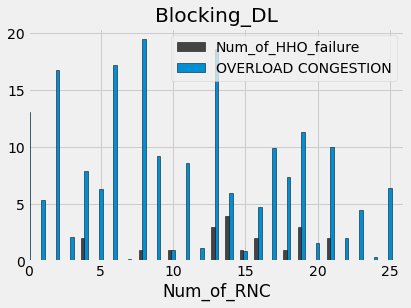

In [86]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
x_indexes=np.arange(len(over))
width=0.25
plt.bar(x_indexes-width,HHO,width=width,color="#444444",edgecolor='black',label='Num_of_HHO_failure')
plt.bar(x_indexes,over,width=width,color="#008fd5",edgecolor='black',label='OVERLOAD CONGESTION')
#plt.bar(x_indexes+width,SHO,width=width,color="#e5ae38",edgecolor='black',label='Num_of_SHO_failure')
plt.title('Blocking_DL')
plt.legend()
#plt.ylabel('Num_Of_HHO_Failure')
plt.xlabel('Num_of_RNC')
plt.xlim([0,26])
plt.show()

<BarContainer object of 26 artists>

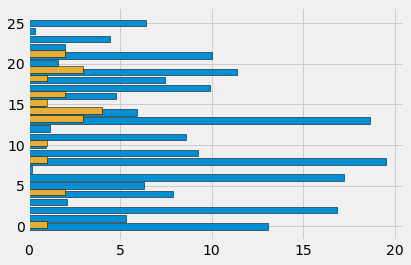

In [85]:
plt.barh(x_indexes,over,color="#008fd5",edgecolor='black',label='OVERLOAD CONGESTION')
plt.barh(x_indexes+width,HHO,color="#e5ae38",edgecolor='black',label='Num_of_HHO_failure')

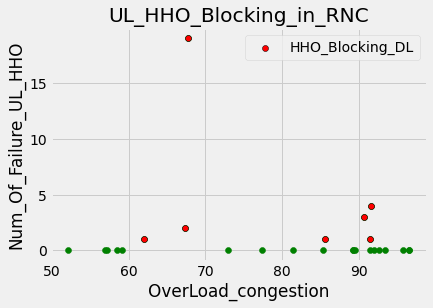

In [97]:
##############################################
plt.style.use("fivethirtyeight")
plt.scatter(over,HHO,color = "green")
flag=False
for i in range(0,len(HHO)):
    if HHO[i]>0 and flag==False:
        plt.scatter(over[i], HHO[i],color = "red",edgecolors='black',label='HHO_Blocking_DL')
        flag=True
    elif HHO[i]>0:
        plt.scatter(over[i], HHO[i],color = "red",edgecolors='black')
plt.title("UL_HHO_Blocking_in_RNC")
plt.xlabel("OverLoad_congestion")
plt.ylabel("Num_Of_Failure_UL_HHO")
plt.legend()
plt.show()   

In [30]:
l=dict_2.get(RNC_Col_list[1])

In [32]:
#l[0]

In [35]:
OLC=[]
for k,i in enumerate (RNC_Col_list):
    num=0
    m=[];n=[]
    l=dict_2.get(i)
    m=l[0]
    n=l[1]
    for j in range (0,len(m)):
        if m[j] or n[j]:
            num=num+1
    OLC.append(num/res[k]*100)        